# Employee Resignation Prediction - Regression Model
This Model is demonstrates step-by-step regression modeling using `resigning_prediction_dataset.csv` dataset.
We used Linear Regression for prediction.

## Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Step 2: Load Dataset

In [2]:
df = pd.read_csv('resigning_prediction_dataset.csv')
df.head()

,EmployeeID,Age,Salary,YearsAtCompany,JobSatisfaction,Resigned
0,EMP1000,50,98953,5,5,No
1,EMP1001,36,72995,3,1,Yes
2,EMP1002,29,60757,12,3,No
3,EMP1003,42,29692,8,2,No
4,EMP1004,40,65758,3,4,No


## Step 3: Dataset Information

In [3]:
print('Shape:', df.shape)
print('\nInfo:')
print(df.info())
print('\nDescribe:')
print(df.describe())

Shape: (50, 6)

Info:
<class 'pandas.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   EmployeeID       50 non-null     str  
 1   Age              50 non-null     int64
 2   Salary           50 non-null     int64
 3   YearsAtCompany   50 non-null     int64
 4   JobSatisfaction  50 non-null     int64
 5   Resigned         50 non-null     str  
dtypes: int64(4), str(2)
memory usage: 2.9 KB
None

Describe:
             Age        Salary  YearsAtCompany  JobSatisfaction
count  50.000000     50.000000       50.000000        50.000000
mean   38.860000  59025.540000        8.640000         2.800000
std    10.719066  23697.954606        4.972414         1.385051
min    23.000000  21016.000000        1.000000         1.000000
25%    29.250000  36155.000000        5.000000         1.250000
50%    39.500000  59301.500000        8.000000         3.000000
75%    46.000000  79818.7

## Step 4: Handle Missing Values

In [4]:
df = df.dropna()
print('Missing values removed')

Missing values removed


## Step 5: Convert Categorical Columns to Numeric

In [5]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
df.head()

,EmployeeID,Age,Salary,YearsAtCompany,JobSatisfaction,Resigned
0,EMP1000,50,98953,5,5,No
1,EMP1001,36,72995,3,1,Yes
2,EMP1002,29,60757,12,3,No
3,EMP1003,42,29692,8,2,No
4,EMP1004,40,65758,3,4,No


## Step 6: Select Features and Target

In [6]:
# Using last column as target
target = df.columns[-1]
X = df.drop(target, axis=1)
y = df[target]
print('Target column:', target)

Target column: Resigned


## Step 7: Split Data into Training and Testing

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training size:', X_train.shape)
print('Testing size:', X_test.shape)

Training size: (40, 5)
Testing size: (10, 5)


In [8]:
X_train = X_train.drop('EmployeeID', axis=1)
X_test = X_test.drop('EmployeeID', axis=1)


In [9]:
print(X_train.select_dtypes(include='object').columns)

Index([], dtype='str')


In [10]:
X_train = X_train.select_dtypes(exclude='object')
X_test = X_test.select_dtypes(exclude='object')

## Step 8: Train Linear Regression Model

In [11]:
# Convert target column
y_train = y_train.map({'Yes': 1, 'No': 0})
y_test = y_test.map({'Yes': 1, 'No': 0})


In [12]:
# Train Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model trained successfully")


Model trained successfully


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Model trained successfully')

Model trained successfully


## Step 9: Make Predictions

In [14]:
y_pred = model.predict(X_test)
print('Predictions:', y_pred[:10])

Predictions: [ 0.07152446 -0.08296261 -0.26252662  0.20859805  0.06737199  0.08794018
  0.1751538   0.3661466  -0.42970186 -0.03467062]


## Step 10: Evaluate Regression Model

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 0.0487292305566251
R2 Score: 0.0


## Step 11: Visualization

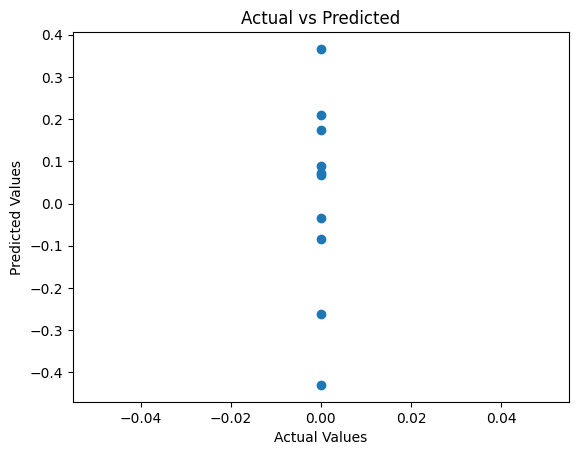

In [16]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()